### DATA EXPLORATION

In [272]:
%matplotlib inline  
import pandas as pd                        #Importing Libraries
import numpy as np
df = pd.read_csv('Coursework_1_data.csv')  #Importting Dataset
df.info()                                  #Display Data Set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [273]:
df.isnull().values.any()               #checking null values

False

In [274]:
df.head()                              #display only top 5 entries in the dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [275]:
df.describe()                  #describing the dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [276]:
df[['Revenue']].value_counts(normalize = True)  #Percentage of True and False of revenue column

Revenue
False      0.845255
True       0.154745
dtype: float64

In [277]:
df['Month'].value_counts()                       #Number of entries per month in descending order

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

### DATA PREPROCESSING

In [278]:
from sklearn import metrics                           #Importing library for metric calculation
from sklearn.model_selection import train_test_split  #Importing library for testing and training dataset
import matplotlib.pyplot as plt                       #Importing library for plotting graphs
import seaborn as sns                                 #Importing library for Data Visualization

In [279]:
df['Weekend']=df['Weekend'].replace({True:'Week1',False:'Week0'})
df['Revenue']=df['Revenue'].replace({True:'TRev',False:'FRev'})
df=pd.concat([df,pd.get_dummies(df['Month']),pd.get_dummies(df['VisitorType']),pd.get_dummies(df['Weekend']),pd.get_dummies(df['Revenue'])],axis=1)

In [280]:
df=df.drop(['Month','VisitorType','Weekend','Revenue','FRev'],axis=1) #Dropping extra unnecessary columns
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Week0,Week1,TRev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


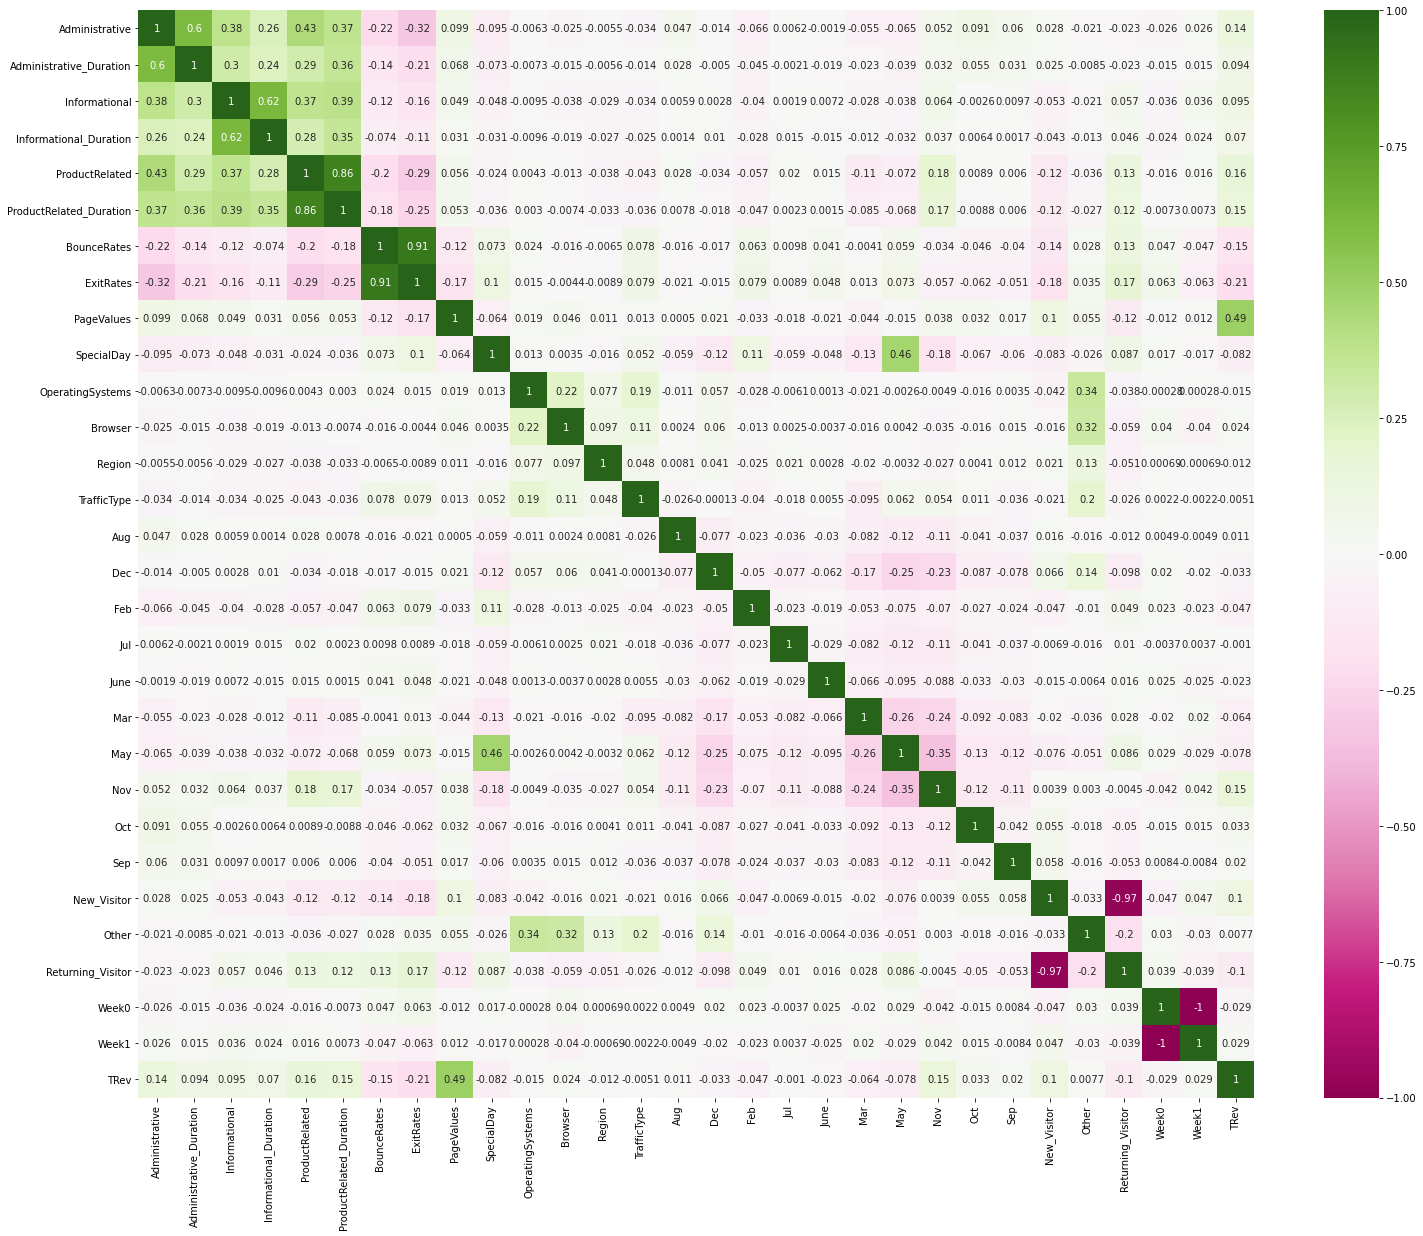

In [281]:
plt.figure(figsize=(25,20))
ax = sns.heatmap(df.corr(),annot = True, cmap = 'PiYG')
plt.show()

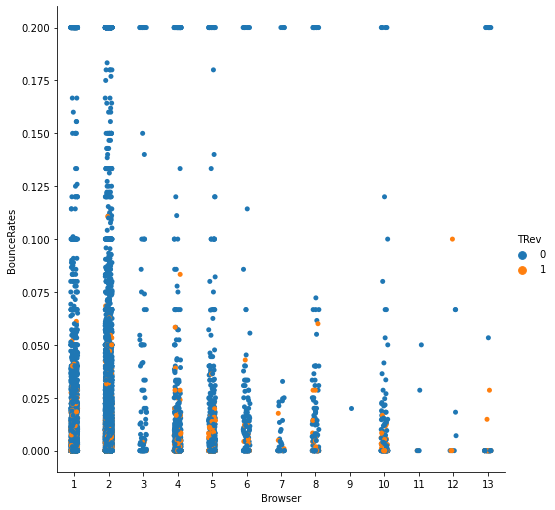

In [282]:
sns.catplot(x="Browser", y="BounceRates", hue="TRev", data=df, height = 7) #check distribution of data

In [283]:
df.info()   #Displaying information of new adjusted dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Aug                   

In [284]:
from sklearn.feature_selection import mutual_info_classif  #Selecting important features
mi_score=mutual_info_classif(df.drop('TRev',axis=1),df['TRev'])
mi_score=pd.Series(mi_score*100,index=df.drop('TRev',axis=1).columns)
mi_score=mi_score.sort_values(ascending=False)
top_fea=mi_score.index[:9]

In [285]:
from sklearn.model_selection import train_test_split  # Splitting dataset in Train and Test
from sklearn.preprocessing import StandardScaler 
df_sc=StandardScaler().fit_transform(df[top_fea])
X_train, X_test, y_train, y_test = train_test_split(df_sc,df['TRev'],random_state=50,test_size=0.30)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=50)

In [286]:
def con_mat(y_test, y_pred):              #Function for Confusion Matrix
    cn_matrix = metrics.confusion_matrix(y_test, y_pred)
    dfcm = pd.DataFrame(cn_matrix, columns=np.unique(y_pred),index=np.unique(y_pred))
    fig, axs = plt.subplots()
    sns.heatmap(dfcm, annot=True, cmap='PuBuGn', fmt='.1f') 
    axs.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion-Matrix', y=1.4)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
def metric_calc(y_test, y_pred):           #Function to calculate all necessary metric calculation
    metricl = list()
    precision = metrics.precision_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    F1 = 2 * (precision * recall) / (precision + recall)

    metricl = [precision,accuracy,recall,F1]
    return metricl

### MODEL IMPLEMENTATION & PERFORMANCE EVALUATION

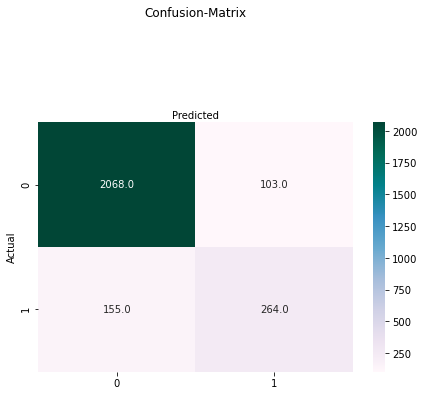

In [287]:
from sklearn.tree import DecisionTreeClassifier        #Import Decision Tree Classifier

dectree = DecisionTreeClassifier(max_depth=5)
dectree.fit(X_train,y_train)
y_pred_clf = dectree.predict(X_test)
con_mat(y_test, y_pred_clf)
dectree_metric = metric_calc(y_test, y_pred_clf)

In [288]:
dectree_metric

[0.7193460490463215, 0.9003861003861003, 0.630071599045346, 0.6717557251908397]

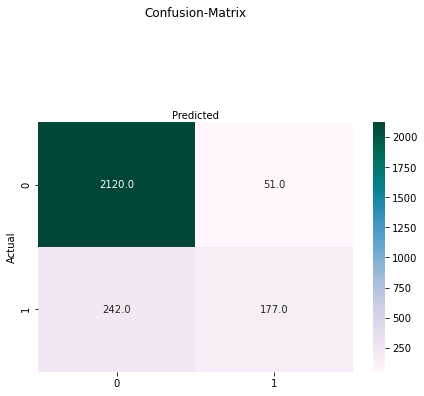

In [289]:
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred_knn = knn.predict(X_test_std)
con_mat(y_test,y_pred_knn)
knn_metric = metric_calc(y_test, y_pred_knn)

In [290]:
knn_metric

[0.7763157894736842,
 0.8868725868725869,
 0.4224343675417661,
 0.5471406491499227]

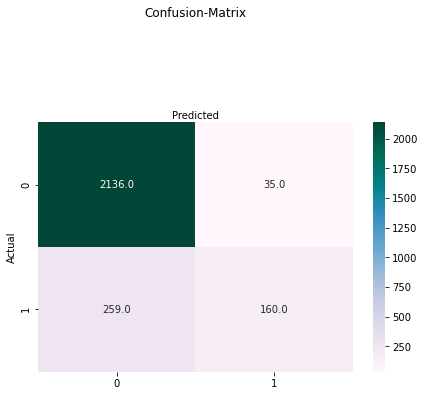

In [291]:
from sklearn.linear_model import LogisticRegression # Import Logistic-Regression Classifier

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
con_mat(y_test,y_pred_logreg)
logreg_metric = metric_calc(y_test, y_pred_logreg)

In [292]:
logreg_metric

[0.8205128205128205,
 0.8864864864864865,
 0.3818615751789976,
 0.5211726384364821]

### RESULT ANALYSIS

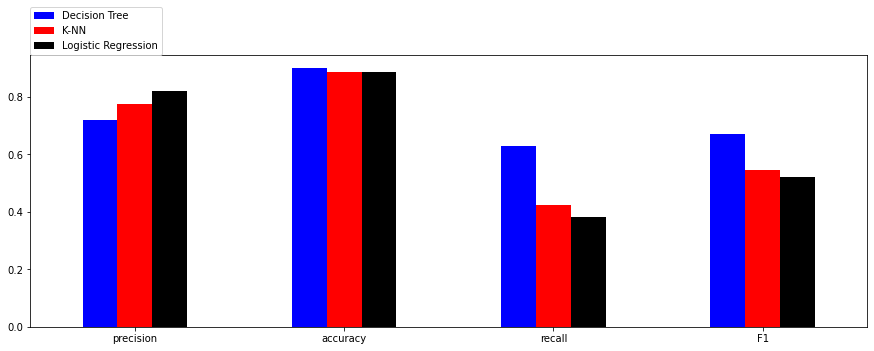

In [267]:
M = pd.DataFrame([dectree_metric, knn_metric, logreg_metric], columns=['precision','accuracy','recall','F1'],
                     index=['Decision Tree', 'K-NN', 'Logistic Regression']) #Display all 3 classifiers
c = ['blue' , 'red', 'black']

M.T.plot.bar(figsize = (15,5),rot = 0, color = c)
plt.legend(loc=(0,1))

In [268]:
M

,precision,accuracy,recall,F1
Decision Tree,0.721311,0.900772,0.630072,0.672611
K-NN,0.776316,0.886873,0.422434,0.547141
Logistic Regression,0.820513,0.886486,0.381862,0.521173


<AxesSubplot:>

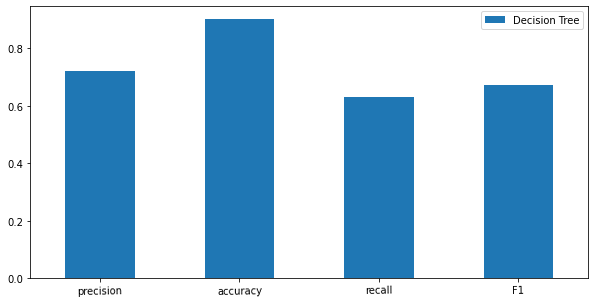

In [269]:
M = pd.DataFrame([dectree_metric], columns=['precision','accuracy','recall','F1'],
                     index=['Decision Tree'])

M.T.plot.bar(figsize = (10,5),rot = 1)